In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("Ads_CTR_Optimisation.csv")

In [3]:
dataset.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [4]:
#implementing Thompson Sampling

import random
N = 10000
d = 10
ads_selected = []
number_of_rewards_1 = [0]*d
number_of_rewards_0 = [0]*d
total_rewards = 0

for n in range(N):
    ads = 0
    max_random = 0
    for i in range(d):
        random_beta = random.betavariate(number_of_rewards_1[i]+1, number_of_rewards_0[i]+1)
        if(random_beta>max_random):
            max_random = random_beta
            ads = i
    rewards = dataset.values[n, ads]
    if (rewards == 1):
        number_of_rewards_1[ads] += 1
    else:
        number_of_rewards_0[ads] +=1
    ads_selected.append(ads)
    total_rewards += rewards
    
        

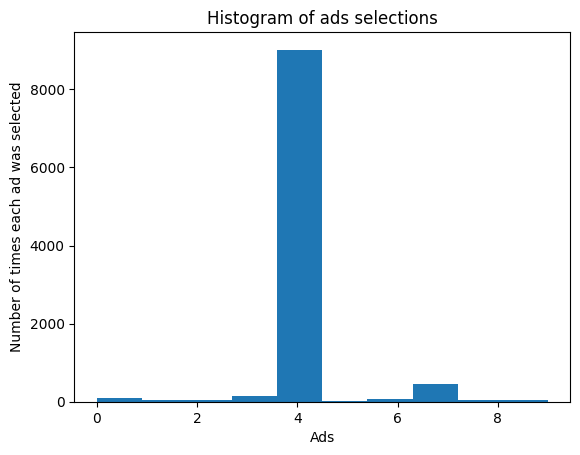

In [5]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()


In [6]:
#Thompson sampling model can predict the ad within 500 rounds(N=500),which UCB can't.thompson is a probabilistic model where UCB is a deterministic model
